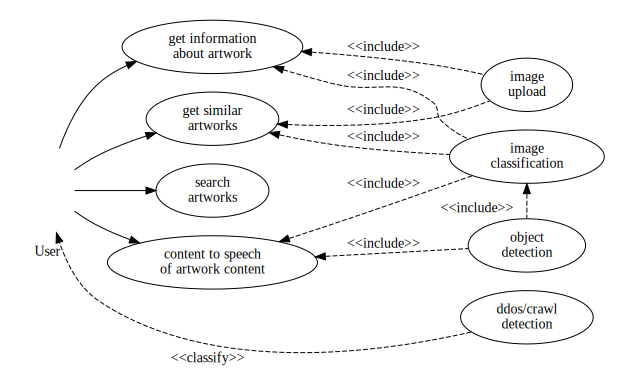

In [3]:
from graphviz import Digraph
g = Digraph('usecases', filename='usecases.gv', format='png')
g.attr(rankdir='LR', compound='true')

# define user node as subgraph
with g.subgraph(name='cluster_user') as sg:
    sg.node('user', penwidth='0', label='', shapefile='res/user.png')
    sg.attr(label='User', labelloc='b', penwidth='0')

# usecases
g.node('uc1', 'get information\nabout artwork')
g.node('uc2', 'get similar\nartworks')
g.node('uc3', 'search\nartworks')
g.node('uc4', 'content to speech\nof artwork content')
with g.subgraph(name='cluster_usecases') as sg:
    sg.attr(penwidth='0', rankdir='TB', rank='same', ranksep='0')
    sg.node('uc1')
    sg.node('uc2')
    sg.node('uc3')
    sg.node('uc4')
    sg.attr(label='')

# functions
g.node('f1', 'image\nupload')
g.node('f2', 'image\nclassification')
g.node('f3', 'object\ndetection')
g.node('f4', 'ddos/crawl\ndetection')
with g.subgraph(name='cluster_functions') as sg:
    sg.attr(penwidth='0', rankdir='TB', rank='same', ranksep='0')
    sg.node('f1')
    sg.node('f2')
    sg.node('f3')
    sg.node('f4')
    sg.attr(label='')

# edges
g.edge('user', 'uc1')
g.edge('user', 'uc2')
g.edge('user', 'uc3')
g.edge('user', 'uc4')
g.edge('uc1', 'f1', label='\<\<include\>\>', style='dashed', dir='back')
g.edge('uc1', 'f2', label='\<\<include\>\>', style='dashed', dir='back')
g.edge('uc2', 'f1', label='\<\<include\>\>', style='dashed', dir='back')
g.edge('uc2', 'f2', label='\<\<include\>\>', style='dashed', dir='back')
g.edge('uc4', 'f2', label='\<\<include\>\>', style='dashed', dir='back')
g.edge('uc4', 'f3', label='\<\<include\>\>', style='dashed', dir='back')
g.edge('f2', 'f3', constraint='false', xlabel='\<\<include\>\>', style='dashed', dir='back')
g.edge('f4', 'user', xlabel='\<\<classify\>\>', style='dashed')

# save to file
g.render()

# show in notebook
g